# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train = train.sample(n = 100000, random_state = 123)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [6]:
# train = train.fillna('')

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [7]:
train['title&description'] = train['title'] + ' ' +  train['description']

In [8]:
print (train)

                                                   title  \
3111607               Ваза напольная итальянской фабрики   
3608642                              Коляска б/у Lambada   
2061669                             Резина на полуприцеп   
2785016                         Платье Gulliver 2-3 года   
1232002                            Зимние сапоги skandia   
...                                                  ...   
2941421                              Сандали Nordman 31р   
101480                           Тренажер степпер torneo   
2397949               Рулевая Рейка Kia Soul 2 2013-2018   
1798302                                 Платье свадебное   
2629458  Новая кукла Kima от Annette Himstedt. Рассрочка   

                                               description  \
3111607  Ваза красная напольная. размеры на фото. фабри...   
3608642                  2 в1 и 3в1 в идеальном состоянии!   
2061669  Резина на запаску. Без латок и порезов. Остато...   
2785016  В идеальном состоянии,

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [9]:
len(train['Category'].unique())
# количество уникальных классов

50

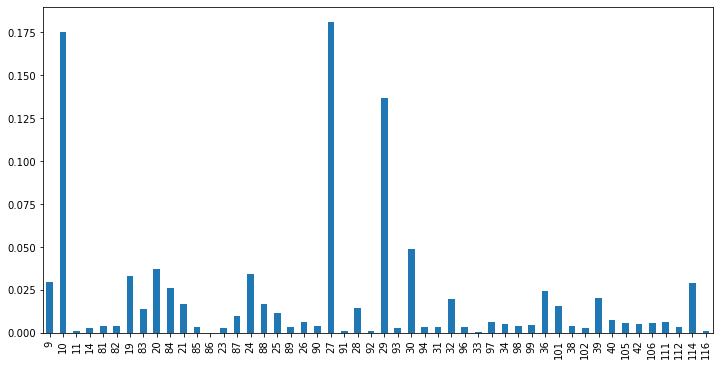

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.figure(figsize=(12,6))
train['Category'].value_counts(normalize=True, sort=False).plot.bar()

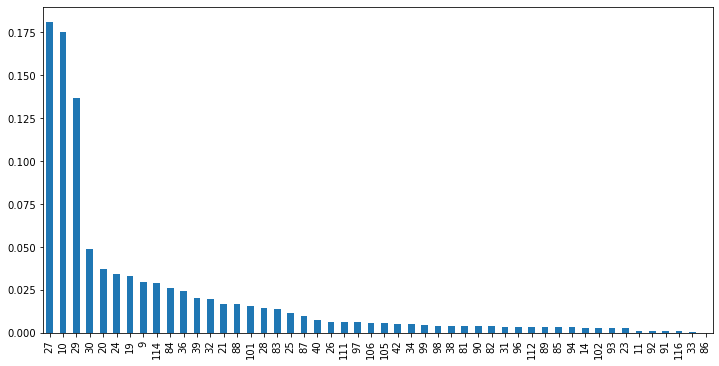

In [11]:
plt.figure(figsize=(12,6))
train['Category'].value_counts(normalize=True, sort=True).plot.bar()

In [12]:
# наибольшую долю имеет 27 класс, его доля около 18%, в то время как наименьшую долю имеет 86 - доля приближенная к 0

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
train_v = vectorizer.fit_transform(train['title&description'])
train_v.size

3568456

In [13]:
train_v.shape

(100000, 230883)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [41]:
import string
punct = set(string.punctuation)
alp = 0
punctu = 0

for x in vectorizer.vocabulary_.keys():
    if x[0].isalpha():
        alp+=1
    elif x[0] in punct:
        punctu+=1
print ('Начинается на цифру: ', alp)
print ('Начинается на пунктуацию: ', punctu)

Начинается на цифру:  72876
Начинается на пунктуацию:  0


In [15]:
train.head()

,title,description,Category_name,Category,title&description
3111607,Ваза напольная итальянской фабрики,Ваза красная напольная. размеры на фото. фабри...,Мебель и интерьер,20,Ваза напольная итальянской фабрики Ваза красна...
3608642,Коляска б/у Lambada,2 в1 и 3в1 в идеальном состоянии!,Товары для детей и игрушки,30,Коляска б/у Lambada 2 в1 и 3в1 в идеальном сос...
2061669,Резина на полуприцеп,Резина на запаску. Без латок и порезов. Остато...,Запчасти и аксессуары,10,Резина на полуприцеп Резина на запаску. Без ла...
2785016,Платье Gulliver 2-3 года,"В идеальном состоянии, очень дорого выглядит, ...",Детская одежда и обувь,29,Платье Gulliver 2-3 года В идеальном состоянии...
1232002,Зимние сапоги skandia,Зимние сапоги,Детская одежда и обувь,29,Зимние сапоги skandia Зимние сапоги


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [26]:
%%time
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
bad_punct = re.compile('[/(){}\[\]\|@,;]')
numbers = re.compile('[0-9a-z #+_]')
stem = SnowballStemmer('russian')
punctuation = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'", '*']
a = 0
def clean_text (words):
    global a
    words = words.lower()
    words = bad_punct.sub(' ', words)
    words = numbers.sub(' ', words)
    words = word_tokenize(words)
    result = []
    for x in words:
        if x not in stopwords and x not in punctuation:
            x = stem.stem(x)
            result.append(x)
    a+= 1
    if a%1000 == 0:
    print (a)
    return ' '.join (result)

train['corpus'] = train['title&description'].apply(clean_text)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
Wall time: 3min 57s


In [27]:
print (train.head())

                                      title  \
3111607  Ваза напольная итальянской фабрики   
3608642                 Коляска б/у Lambada   
2061669                Резина на полуприцеп   
2785016            Платье Gulliver 2-3 года   
1232002               Зимние сапоги skandia   

                                               description  \
3111607  Ваза красная напольная. размеры на фото. фабри...   
3608642                  2 в1 и 3в1 в идеальном состоянии!   
2061669  Резина на запаску. Без латок и порезов. Остато...   
2785016  В идеальном состоянии, очень дорого выглядит, ...   
1232002                                      Зимние сапоги   

                      Category_name  Category  \
3111607           Мебель и интерьер        20   
3608642  Товары для детей и игрушки        30   
2061669       Запчасти и аксессуары        10   
2785016      Детская одежда и обувь        29   
1232002      Детская одежда и обувь        29   

                                         title&de

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [28]:
from sklearn.model_selection import train_test_split
x = vectorizer.fit_transform(train['corpus'].values)
y = train.Category.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1337)

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
print (y_train)
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

[28 88 84 ... 32 20 27]


SGDClassifier()

In [30]:
prediction = sgd.predict(x_test)
print (accuracy_score(y_test, prediction))

0.8199


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(train['corpus'].values)
y = train.Category.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1337)

In [32]:
sgd.fit(x_train, y_train)
prediction = sgd.predict(x_test)
print (accuracy_score(y_test, prediction))

0.82465


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [33]:
from sklearn.feature_extraction.text import HashingVectorizer
hashi = HashingVectorizer(n_features = 30000)
x = hashi.fit_transform(train['corpus'].values)
y = train.Category.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1337)

In [34]:
sgd.fit(x_train, y_train)
prediction = sgd.predict(x_test)
print (accuracy_score(y_test, prediction))

# Самый лучший подход оказался tf-idf, но у всех почти одинаковая ошибка

0.80825


## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [35]:
test = pd.read_csv('test.csv')

In [36]:
test['title&description'] = test['title'] + ' ' +  test['description']
test = test.fillna('')

In [37]:
test['corpus'] = test['title&description'].apply(clean_text)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(train['corpus'].values)
y = train.Category.values
sgd.fit(x, y)

101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000
160000
161000
162000
163000
164000
165000
166000
167000
168000
169000
170000
171000
172000
173000
174000
175000
176000
177000
178000
179000
180000
181000
182000
183000
184000
185000
186000
187000
188000
189000
190000
191000
192000
193000
194000
195000
196000
197000
198000
199000
200000
201000
202000
203000
204000
205000
206000
207000
208000
209000
210000
211000
212000
213000
214000
215000
216000
217000
218000
219000
220000
221000
222000
223000
224000
225000
226000
227000
228000
229000
230000
231000
232000
233000
234000
235000
236000
237000
238000
239000
240000
241000
242000
243000

SGDClassifier()

In [38]:
x_test = tfidf.transform(test['corpus'].values)
prediction = sgd.predict(x_test)

In [40]:
subm = pd.DataFrame({'Id':test.itemid, 'Category':prediction})
subm.to_csv('submission.csv', index = False)

In [ ]:
# Таким образом, после мучительного часа обработки данных, мы получили на кегле Score 0.82, результат достаточно хороший,
# несмотря на то, что мы взяли на треин всего 100 тысяч объектов